###### Assessment

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 =  pd.read_csv('college_1.csv')
df2 =  pd.read_csv('college_2.csv')


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [119]:
df = pd.merge(df1,df2,how = "outer")


/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [121]:
Unsatisfactory_df = df.loc[(df["CodeKata Score"] < 7000)]
Needs_improvement_df = df.loc[(df["CodeKata Score"] > 7000) & (df["CodeKata Score"] < 10000)]
Reached_expectations_df = df.loc[(df["CodeKata Score"] > 10000) & (df["CodeKata Score"] < 15000)]
Exceeded_expectations_df = df.loc[(df["CodeKata Score"]  > 15000)]

In [122]:
Unsatisfactory_df.to_csv("Unsatisfactory.cs",index = False)
Needs_improvement_df.to_csv("Needs_improvement.cs",index = False)
Reached_expectations_df.to_csv("Reached_expectations.cs",index = False)
Exceeded_expectations_df.to_csv("Exceeded_expectations.cs",index = False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [123]:
a = df["Previous Geekions"].mean()
b = df["Rising"].mean()
c = df["CodeKata Score"].mean()
print(b)
c - a

209.41176470588235


209.41176470588243

###### No of students participated 

In [124]:
len(df)

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [125]:
python = df["python"].mean()
mysql = df["mysql"].mean()
python_en = df["python_en"].mean()
computational_thinking = df["computational_thinking"].mean()
print(python)
print(mysql)
print(python_en)
computational_thinking

54.35294117647059
23.5
29.65714285714286


2.2

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [126]:
rising_df = df.loc[(df["Rising"] > 0)]
rising_df.sort_values("Rising", ascending = False)["Name"][0:3]

92              shifak N
86     Ganesh Ramkumar R
102       Narasimhan Y L
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [127]:
Exceeded_expectations_df = df.loc[(df["CodeKata Score"]  > 15000)]
Exceeded_expectations_df["Name"][0:3]

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

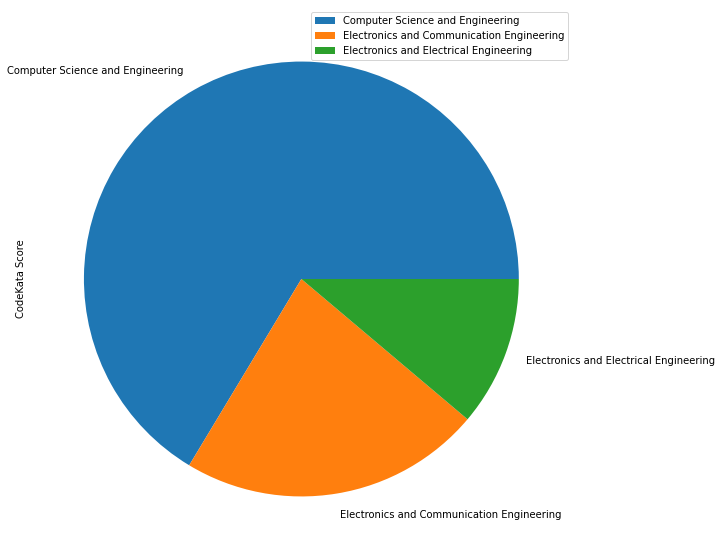

In [128]:
df.groupby(['Department']).sum().plot(kind='pie', y = 'CodeKata Score',figsize=(10,10));

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

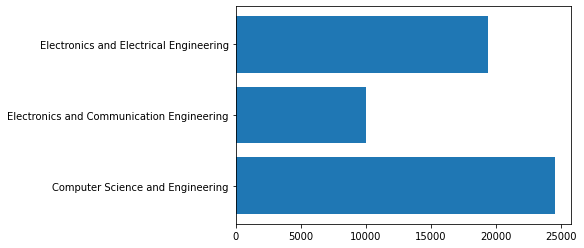

In [129]:
plt.barh(y = df["Department"], width = df["CodeKata Score"])
plt.show()

In [130]:
ece_df = df.loc[(df["Department"]  == "Electronics and Communication Engineering")]
eee_df = df.loc[(df["Department"]  == "Electronics and Electrical Engineering")]
cse_df = df.loc[(df["Department"]  == "Computer Science and Engineering")]
va_df = ece_df.sort_values("CodeKata Score",ascending = False)[["Name","CodeKata Score","Department"]][0:1]
ua_df = eee_df.sort_values("CodeKata Score",ascending = False)[["Name","CodeKata Score","Department"]][0:1]
wa_df = cse_df.sort_values("CodeKata Score",ascending = False)[["Name","CodeKata Score","Department"]][0:1]
final1_df = pd.merge(va_df,ua_df,how = "outer")
final_df = pd.merge(final1_df,wa_df,how = "outer")
final_df

,Name,CodeKata Score,Department
0,Bodipudi Harini,10040,Electronics and Communication Engineering
1,ASHOK KUMAR K,19400,Electronics and Electrical Engineering
2,A.Dharani,24500,Computer Science and Engineering
